In [1]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from random import seed
from random import randint
seed(1)

In [2]:
class RoomModel(ap.Model):

    def setup(self):

        # Create agents
        n_vacuums = int(self.p['Number of vacuum cleaners'])
        self.vacuums = ap.AgentList(self, n_vacuums)
        
        n_tiles = int(self.p['Percentage of dirty tiles'] * (self.p['width']*self.p['height']))
        self.tiles = ap.AgentList(self, n_tiles)
        
        vacuumPositions = []
        for n in range(n_vacuums):
            vacuumPositions.append((1,1))
        
        # Create grid (room)
        self.room = ap.Grid(self, (self.p['width'], self.p['height']), track_empty=True)
        self.room.add_agents(self.vacuums, vacuumPositions, empty = True)
        self.room.add_agents(self.tiles, random = True, empty = True)

        # Initiate a dynamic variable for tiles
        # Condition 0: dirty, 1: clean
        self.tiles.condition = 0
        self.vacuums.condition = 2
        
        self.numberOfMovements = 0

    def step(self):
    
        for vacuum in self.vacuums:
            for neighbor in self.room.neighbors(vacuum, distance = 0):
                if neighbor.condition == 0:
                    neighbor.condition = 1
                    break
            #If there isn't any dirty tile
            self.room.move_by(vacuum,(randint(-1,1),randint(-1,1)))
            self.numberOfMovements +=1
            
        if len(self.tiles.select(self.tiles.condition == 0)) == 0:
            self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        cleansed_tiles = len(self.tiles.select(self.tiles.condition == 1))
        self.report('Percentage of cleansed tiles',
                    cleansed_tiles / len(self.tiles))
        self.report('Number of vacuums',
                    len(self.vacuums))
        self.report('Number of movements of all vacuums',
                    self.numberOfMovements)
        self.report('Time-step',
                    self.t)

In [3]:
# Define parameters

parameters = {
    'Number of vacuum cleaners': 10,
    'Percentage of dirty tiles': 0.6,
    'width': 5,
    'height': 5, # Height and length of the grid
    'steps': 10,
}

In [4]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('condition')
    color_dict = {0:'#a36424', 1:'#FFFFFF', 2:'#e6e6e6', None:'#FFFFFF'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a room\n"
                 f"Time-step: {model.t}, Cleaned : "
                 f"{len(model.tiles.select(model.tiles.condition == 1))}")

fig, ax = plt.subplots()
model = RoomModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))

In [5]:
# Prepare parameter sample
parameters = {
    'Number of vacuum cleaners': ap.Range(1, 25),
    'Percentage of dirty tiles': 0.8,
    'width': 25,
    'height': 25,
    'steps': 2000,
}
sample = ap.Sample(parameters, n=30)

In [6]:
# Perform experiment
exp = ap.Experiment(RoomModel, sample, iterations=1)
results = exp.run()

Scheduled runs: 30
Completed: 30, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:22.548387


In [7]:
# Save and load data
results.save()
results = ap.DataDict.load('RoomModel')

Data saved to ap_output/RoomModel_45
Loading from directory ap_output/RoomModel_45/
Loading parameters_sample.csv - Successful
Loading parameters_constants.json - Successful
Loading reporters.csv - Successful
Loading info.json - Successful
Loading parameters_log.json - Successful


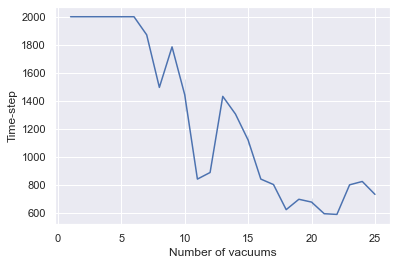

In [8]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='Number of vacuums',
    y='Time-step'
);

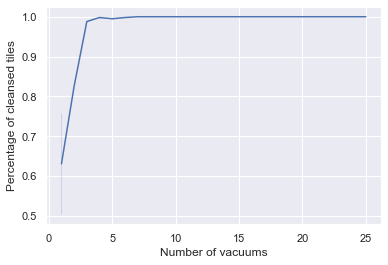

In [9]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='Number of vacuums',
    y='Percentage of cleansed tiles'
);

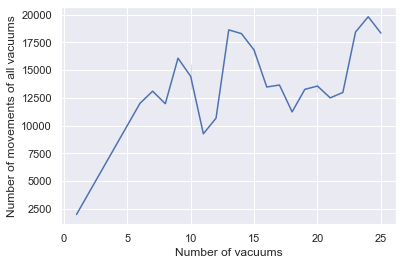

In [10]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='Number of vacuums',
    y='Number of movements of all vacuums'  
);